In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
from cosmology import Cosmology
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
M_path = "cache/_M/"

In [3]:
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher = Fisher(N0_file, N0_offset=2)
fisher.setup_bispectra(M_path)

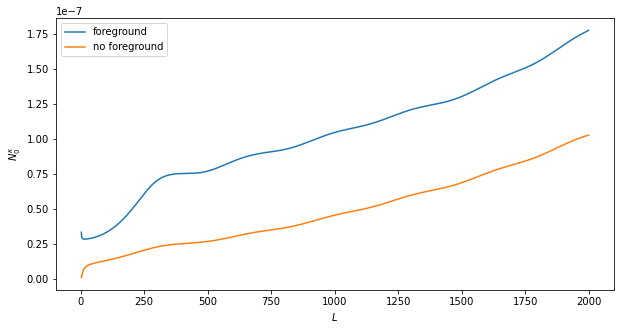

In [4]:
ellmax = 2000
N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:], label="foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")

N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file)

N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:], label="no foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.legend()
plt.show()

In [5]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=True)
print("No foreground (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


No foreground (S/N)
---------------------------
kkw = 1.1371585738235743
kkw + one N_k= 1.5808612179381802
kkw + no N_k= 1.9303691360939466
ggw = 0.38634348264951923
gkw = 5.916820860793884
IIw (353) = 0.3225574659037461
Ikw (353) = 1.3521423962724715
Igw (353) = 8.55389464408407
Matrix([[kk, kg], [gk, gg]])
optimal kg= 7.509963645088267
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.6777041120957468
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 9.047480784096171
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 10.787605343394775
---------------------------
Time = 482.39294695854187


In [5]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/SO_base/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=True)
print("Foreground (baseline) (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

Foreground (baseline) (S/N)
---------------------------
kkw = 0.42473707958558776
kkw + one N_k= 0.7751569863397889
kkw + no N_k= 1.1320277747791458
ggw = 0.24204348680459728
gkw = 2.739063741007692
IIw (353) = 0.17832265950247111
Ikw (353) = 0.6341002005386307
Igw (353) = 5.001637163065799
Matrix([[kk, kg], [gk, gg]])
optimal kg= 3.296781648224503
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 0.7525287161234844
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 5.277338446557168
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 5.848122167138672
---------------------------
Time = 464.60506796836853


In [6]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/SO_goal/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=True)
print("Foreground (goal) (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

Foreground (goal) (S/N)
---------------------------
kkw = 0.6249314068634318
kkw + one N_k= 1.0309137103993882
kkw + no N_k= 1.405141862797734
ggw = 0.2930316157232758
gkw = 3.7224454284413744
IIw (353) = 0.2267905247304106
Ikw (353) = 0.8573636693986133
Igw (353) = 6.2258035281646595
Matrix([[kk, kg], [gk, gg]])
optimal kg= 4.554195667624347
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.0296741549201425
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 6.574959176215798
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 7.449670411656501
---------------------------
Time = 447.1393599510193


Matrix([[kk]])
optimal k = 1.132633306731199


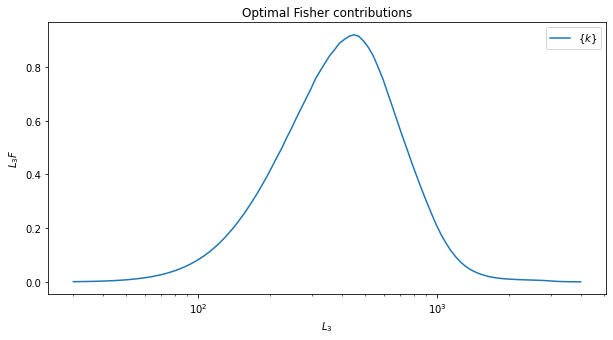

Time = 15.957590103149414


In [8]:
t0 = time.time()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
F_opt = fisher.get_optimal_bispectrum_Fisher("k", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal k = {np.sqrt(F_opt)}")
F_k = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_k, label="$\{k\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
optimal kg = 7.50236587431556


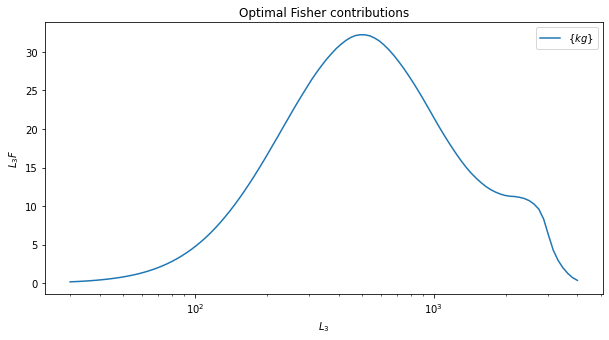

Time = 128.13352608680725


In [9]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal kg = {np.sqrt(F_opt)}")
F_kg = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kg, label="$\{kg\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[gg, gy], [yg, yy]])
optimal gI = 9.045646273727206


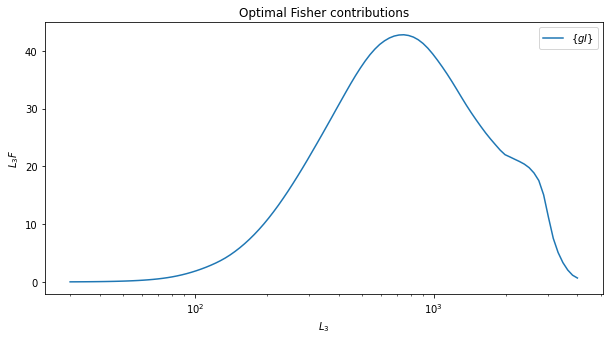

Time = 128.4883189201355


In [10]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("gI", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal gI = {np.sqrt(F_opt)}")
F_kg = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kg, label="$\{gI\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, ky], [yk, yy]])
optimal gI = 1.6702958151637344


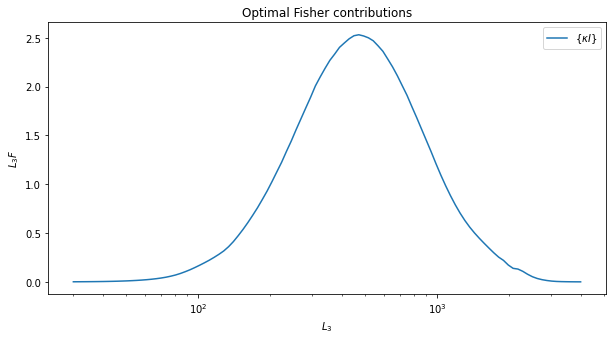

Time = 125.29447913169861


In [11]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal gI = {np.sqrt(F_opt)}")
F_kI = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kI, label="$\{\kappa I\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
optimal kgI = 10.781032789283522


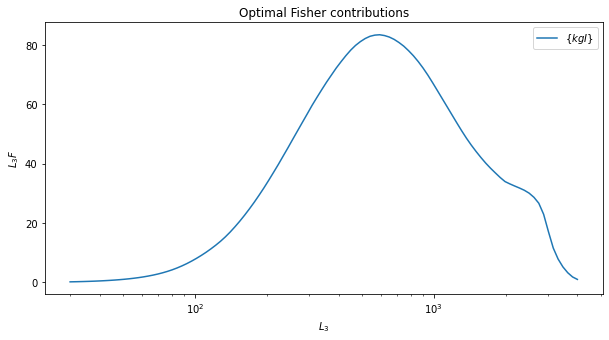

Time = 560.3770501613617


In [12]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kgI", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal kgI = {np.sqrt(F_opt)}")
F_kgI = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kgI, label="$\{kgI\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk]])
Matrix([[gg]])
Matrix([[yy]])


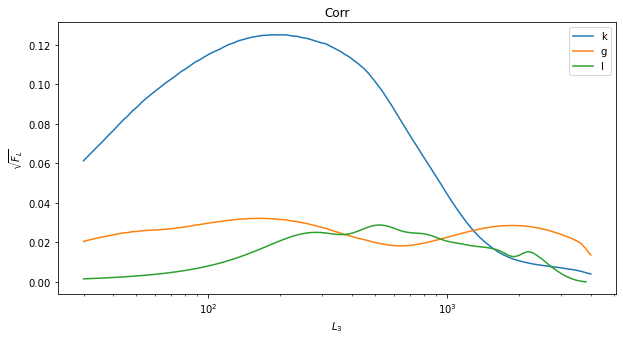

Time = 71.21977114677429


In [13]:
t0 = time.time()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
typs = ["k", "g", "I"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
for typ in typs:
    Ls, F_L = fisher.get_F_L(typ, Ls=Ls, Ntheta=100, nu=353e9)
    plt.semilogx(Ls, np.sqrt(F_L), label=f"{typ}")
plt.ylabel("$\sqrt{F_L}$")
plt.xlabel("$L_3$")
plt.title("Corr")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
Matrix([[kk, ky], [yk, yy]])
Matrix([[gg, gy], [yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])


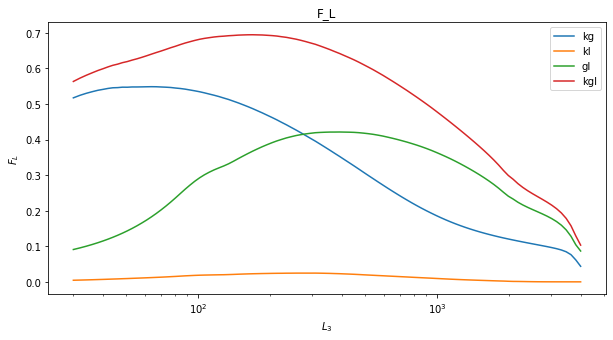

Time = 972.7294089794159


In [14]:
t0 = time.time()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
typs = ["kg", "kI", "gI", "kgI"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
for typ in typs:
    Ls, F_L = fisher.get_F_L(typ, Ls=Ls, Ntheta=100, nu=353e9)
    plt.semilogx(Ls, F_L, label=f"{typ}")
plt.ylabel("$F_L$")
plt.xlabel("$L_3$")
plt.title("F_L")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

In [15]:
from cosmology import Cosmology
from scipy.interpolate import InterpolatedUnivariateSpline
cosmo = Cosmology()
omega_Ls, omega_ps = cosmo.get_postborn_omega_ps(8000)
omega_ps_spline = InterpolatedUnivariateSpline(omega_Ls, omega_ps)

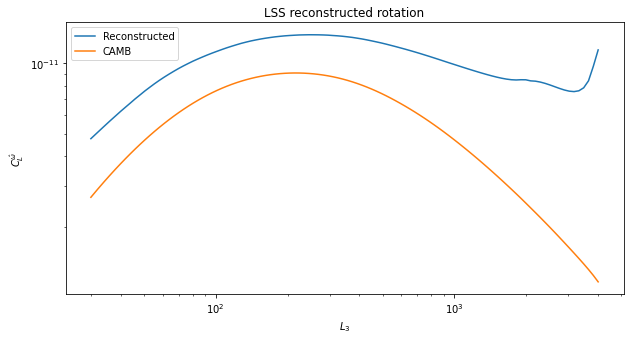

In [16]:
plt.loglog(Ls, omega_ps_spline(Ls)/F_L, label="Reconstructed")
plt.loglog(Ls, omega_ps_spline(Ls), label="CAMB")
plt.ylabel("$C^{\hat{\omega}}_{L}$")
plt.xlabel("$L_3$")
plt.title("LSS reconstructed rotation")
plt.legend()
plt.show()

In [17]:
Ntheta = 100
f_sky = 0.4
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
t0 = time.time()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=100, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls,Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Ls=Ls, Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Ls=Ls, Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

kkw = 1.132633306812747
kkw + one N_k= 1.5631201185178025
kkw + no N_k= 1.9154282880481506
ggw = 0.3845632661214534
gkw = 5.913394740379549
IIw (353) = 0.30523193231171186
Ikw (353) = 1.3264700805941871
Igw (353) = 8.443719835644151
----------------------------
Matrix([[kk, kg], [gk, gg]])
optimal kg= 7.50236587431556
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 1.6702958151637344
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 9.045646273727206
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 10.781032789283522
----------------------------
Time = 984.8129427433014


In [18]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
fisher.reset_noise(N0_file, 2, True)
print("No foreground (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 1.1371585738235743
kkw + one N_k= 1.5808612179381802
kkw + no N_k= 1.9303691360939466
ggw = 0.38634348264951923
gkw = 5.916820860793884
IIw (353) = 0.3225574659037461
Ikw (353) = 1.3521423962724715
Igw (353) = 8.55389464408407
----------------------------
Time = 33.84202599525452


1.132633306812747
749.526969144154
1.5631201185178025
1372.1877145259677
1.9154282880481506
2512.116576733704
0.4143010266898701
785.216260016109
0.7521792798151911
2085.6033151998736
1.1177182836876796
2757.044841739878
0.6120349802555322
785.216260016109
1.0069835404770675
1900.3240648411193
1.3889674472606404
2757.044841739878
89.46423411369324


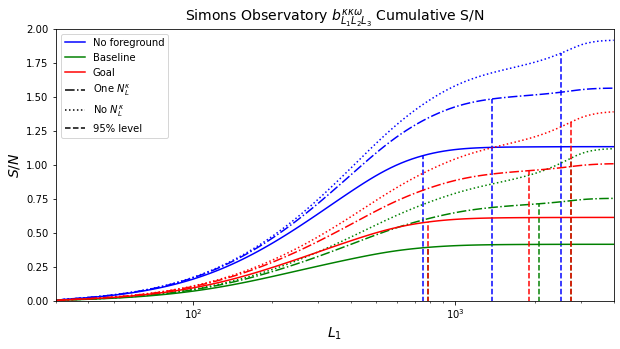

In [33]:
Nells = 500
level = 0.95
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
colors = ["blue", "green", "red"]
N0_files = ["cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy", "cache/_N0/SO_goal/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["No foreground", "Baseline", "Goal"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
offsets = [2,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        F_conv_rot_tmp = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=100, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        F_spline = InterpolatedUnivariateSpline(Ls, F_conv_rot_tmp)
        F_conv_rot = np.array([F_spline.integral(30, L) for L in Ls])
        print(np.sqrt(F_conv_rot[-1]))
        #SNs = np.sqrt(np.cumsum(F_conv_rot))
        SNs = np.sqrt(F_conv_rot)
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Simons Observatory $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 2)
plt.xlim(3e1, 4e3)
plt.legend()
plt.show()

AttributeError: 'Fisher' object has no attribute 'get_convergence_rotation_bispectrum_Fisher'

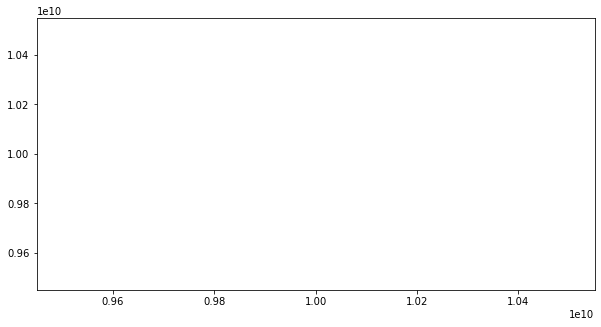

In [22]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red", "orange", "k", "purple"]
N0_files = ["cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy", "cache/_N0/SO_goal/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["Baseline", "Goal"]
bi_labels = ["$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ ", "$b_{L_1L_2L_3}^{gg\omega}$ ", "$b_{L_1L_2L_3}^{g\kappa\omega}$ ", "$b_{L_1L_2L_3}^{II\omega}$ ", "$b_{L_1L_2L_3}^{I\kappa\omega}$", "$b_{L_1L_2L_3}^{I\kappa\omega}$"]
linestyles = ["dashdot", "-"]
offsets = [2,2]
N0_ell_factors = [False, False] 
t0 = time.time()
for jjj in range(len(colors)):
    plt.plot([1e10], [1e10], label=bi_labels[jjj], color=colors[jjj])
    for iii , N0_file in enumerate(N0_files):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        if jjj == 0:
            F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 1:
            F_conv_rot = fisher.get_gal_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 2:
            F_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 3:
            F_conv_rot = fisher.get_cib_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 4:
            F_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 5:
            F_conv_rot = fisher.get_cib_gal_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        plt.semilogx(Ls, SNs, color=colors[jjj], linestyle=linestyles[iii])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[jjj], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.plot([1e10], [1e10], label="Baseline", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="Goal", linestyle="-", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.title("Simons Observatory Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.ylim(-0.5, 5)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

Time = 138.44977188110352


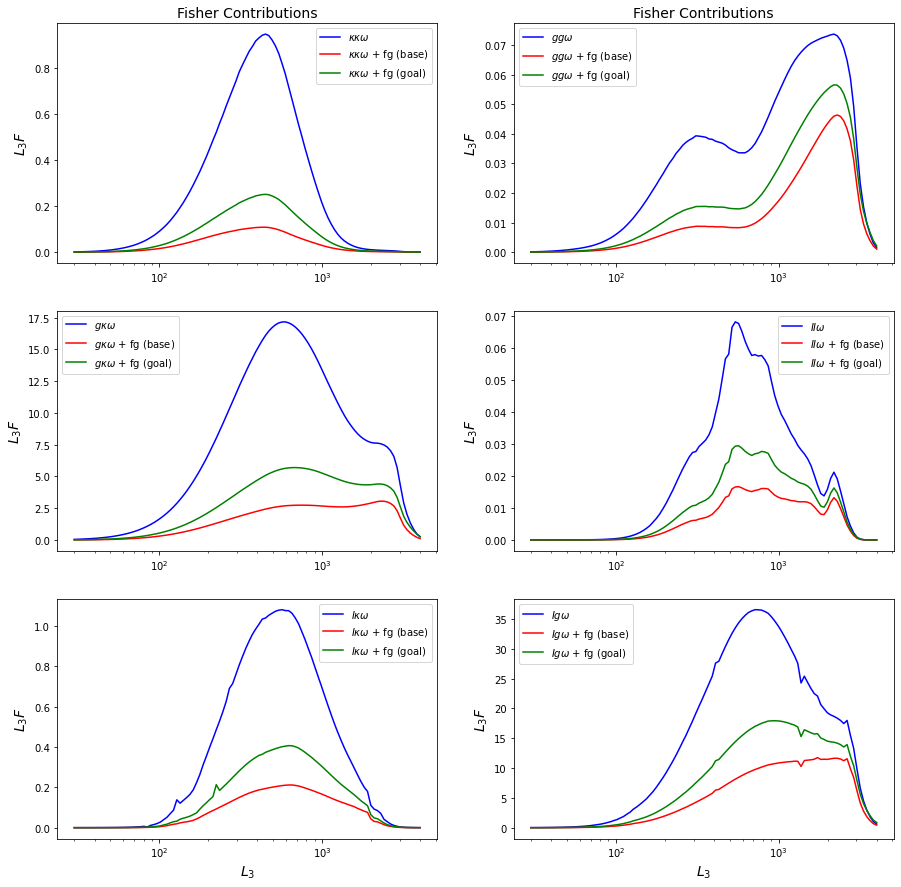

In [30]:
plt.rc('figure', facecolor='w')
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
Ntheta=100
t0 = time.time()
label_typs = ["$\kappa\kappa\omega$", "$gg\omega$", "$g\kappa\omega$", "$II\omega$", "$I\kappa\omega$", "$Ig\omega$"]
typs = ["kkw", "ggw", "gkw", "IIw", "Ikw", "Igw"]
fig, ax = plt.subplots(3,2, figsize=[15, 15])
N0_files = ["cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy", "cache/_N0/SO_goal/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["", " + fg (base)", " + fg (goal)"]
colours = ["blue", "red", "green"]
offsets = [2, 2, 2]
bools = [True, False, False]
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, offsets[iii], bools[iii])
    for jjj, typ in enumerate(typs):
        F_conv_rot = fisher.get_bispectrum_Fisher(typ, Ls=Ls, Ntheta=Ntheta, f_sky=0.4, arr=True)
        row = jjj//2
        if jjj % 2: col = 1
        else: col = 0
        ax[row][col].semilogx(Ls, Ls*F_conv_rot, label=f"{label_typs[jjj]}{labels[iii]}", color=colours[iii])
        ax[row][col].set_ylabel("$L_3F$", fontsize=14)
        ax[row][col].legend()
        if row == 0:
            ax[row][col].set_title(f"Fisher Contributions", fontsize=14)
        elif row == 2:
            ax[row][col].set_xlabel("$L_3$", fontsize=14)
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.show()

In [24]:
# CAMB
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy", "cache/_N0/SO_goal/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [2,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=True, camb=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=False, camb=True)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.17956145350780114
Cross ps S/N = 15.56987430754413
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.047772545626157924
Cross ps S/N = 9.52417000129666
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.07987773159761168
Cross ps S/N = 11.660279910314745
---------------------------
67.19873595237732


In [25]:
# My Cl_omega
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy", "cache/_N0/SO_goal/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [2,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=False)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.18067227707882938
Cross ps S/N = 15.575543939703799
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.04797086383248286
Cross ps S/N = 9.516642783816788
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.08026492290712539
Cross ps S/N = 11.655391265877707
---------------------------
131.91494488716125
